In [79]:
import graphlab as gl

In [80]:
sales= gl.SFrame('home_data.gl')

In [81]:
sales.num_rows(), sales.num_columns()

(21613, 21)

In [82]:
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [83]:
gl.canvas.set_target('ipynb')
sales.show(view='Scatter Plot', x= 'sqft_living', y= 'price')

In [84]:
train_dt, test_dt= sales.random_split(0.8, seed=0)

In [85]:
train_dt.num_rows(), test_dt.num_rows()

(17384, 4229)

In [86]:
sqft_model= gl.linear_regression.create(train_dt, target= 'price', features= ['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16493
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.008765     | 4328839.587932     | 1799048.

In [87]:
test_dt['price'].mean()

543054.0425632534

In [88]:
sqft_model.evaluate(test_dt)

{'max_error': 4127406.6359777255, 'rmse': 255249.64606490862}

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

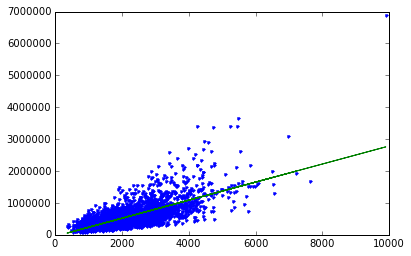

In [90]:
test_preds= sqft_model.predict(test_dt)
plt.plot(test_dt['sqft_living'], test_dt['price'], '.',
        test_dt['sqft_living'], test_preds, '-')

In [91]:
sqft_model.get('coefficients')

name,index,value
(intercept),None,-51748.3513362
sqft_living,None,284.05881854


In [92]:
train_dt.column_names()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [93]:
ff= ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [94]:
train_dt[ff].show()

In [95]:
sales.show(view= 'BoxWhisker Plot', x= 'zipcode', y= 'price')

In [96]:
sales.show(view= 'BoxWhisker Plot', x= 'bedrooms', y= 'price')

In [97]:
adv_model= gl.linear_regression.create(train_dt, target= 'price', features= ff)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16568
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 115
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.070222     | 3732765.813363     | 141520

In [98]:
adv_model.evaluate(test_dt)

{'max_error': 3473189.0860578436, 'rmse': 179605.73984434313}

In [99]:
adv_model.get('coefficients')

name,index,value
(intercept),None,-94050.6039838
bedrooms,2,21806.4416527
bedrooms,4,-41547.9663417
bedrooms,5,-97517.5250202
bedrooms,1,47054.5214594
bedrooms,6,-185509.335256
bedrooms,7,-385516.331945
bedrooms,8,-346537.952972
bedrooms,0,-3569.06341266
bedrooms,9,-441651.165684


In [100]:
print sqft_model.evaluate(test_dt)
print adv_model.evaluate(test_dt)

{'max_error': 4127406.6359777255, 'rmse': 255249.64606490862}
{'max_error': 3473189.0860578436, 'rmse': 179605.73984434313}


In [101]:
house1= sales[sales['id']=='5309101200']
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

In [102]:
pred_sqftm= sqft_model.predict(sales[sales['id']=='5309101200'])
pred_advm= adv_model.predict(sales[sales['id']=='5309101200'])
print pred_sqftm, pred_advm

[629992.8131592515] [724420.441292499]


In [103]:
def comparePreds(hid):
    house= sales[sales['id']==hid]
    print house['price']
    pred_sqftm= sqft_model.predict(house)
    pred_advm= adv_model.predict(house)
    print pred_sqftm, pred_advm    

In [104]:
comparePreds('5309101200')

[620000, ... ]
[629992.8131592515] [724420.441292499]


In [105]:
comparePreds('1925069082')

[2200000, ... ]
[1266284.5666883797] [1450077.8868115202]


#Homework begins here

In [106]:
sales_hh= sales[sales['zipcode']=='98039']
sales_hh.num_rows()

50

In [107]:
sales_hh['price'].mean()

2160606.5999999996

In [108]:
big= sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] <= 4000)]
big.num_rows()

9118

In [109]:
sales.num_rows()

21613

In [110]:
big['sqft_living'].min()

2005

In [111]:
float(big.num_rows())/float(sales.num_rows()) 

0.42187572294452413

In [112]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [113]:
advanced_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'condition',
 'grade',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [114]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [119]:
m1= gl.linear_regression.create(train_dt, target= 'price', features= my_features, validation_set= None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17384
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 115
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.040474     | 3763208.270523     | 181908.848367 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+


In [120]:
m2= gl.linear_regression.create(train_dt, target= 'price', features= advanced_features, validation_set= None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17384
PROGRESS: Number of features          : 18
PROGRESS: Number of unpacked features : 18
PROGRESS: Number of coefficients    : 127
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.073804     | 3469012.450686     | 154580.940736 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+


In [121]:
print m1.evaluate(test_dt)
print m2.evaluate(test_dt)

{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}
{'max_error': 3556849.413858208, 'rmse': 156831.1168021901}


In [122]:
m1.evaluate(test_dt)['rmse'] - m2.evaluate(test_dt)['rmse']

22711.316510500183